## Challenge: Implement the Nearest Neighbor algorithm

The Nearest Neighbor algorithm is extremely simple. So simple, in fact, that you should be able to build it yourself from scratch using the Python you already know. Code a Nearest Neighbors algorithm that works for two dimensional data. You can use either arrays or dataframes to do this. Test it against the SKLearn package on the music dataset from above to ensure that it's correct. The goal here is to confirm your understanding of the model and continue to practice your Python skills. We're just expecting a brute force method here. After doing this, look up "ball tree" methods to see a more performant algorithm design.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

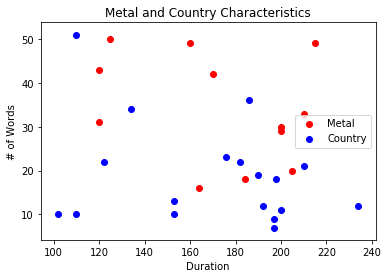

In [2]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 120, 186, 122, 197, 200, 182, 102, 125, 
                     205, 110, 120, 110, 197, 153, 210, 192, 210, 160,
                     164, 198, 200, 153, 234, 190, 215, 200, 176, 170]
music['num_words'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 50, 
                      20, 10, 31, 51, 7, 13, 33, 12, 21, 49,
                      16, 18, 30, 10, 12, 19, 49, 11, 23, 42]

# We know whether the songs in our training data are jazz or not.
music['metal'] = [ 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
                   1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
                   1, 0, 1, 0, 0, 0, 1, 0, 0, 1]


# Look at our data.
plt.scatter(
    music[music['metal'] == 1].duration,
    music[music['metal'] == 1].num_words,
    color='red'
)
plt.scatter(
    music[music['metal'] == 0].duration,
    music[music['metal'] == 0].num_words,
    color='blue'
)
plt.legend(['Metal', 'Country'])
plt.title('Metal and Country Characteristics')
plt.xlabel('Duration')
plt.ylabel('# of Words')
plt.show()

## Test it against the SKLearn package

In [3]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['duration', 'num_words']]
Y = music['metal']
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

array([0], dtype=int64)

In [4]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['duration', 'num_words']]
Y = music['metal']
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

[1]
[[0.4 0.6]]


## Mesh visualization

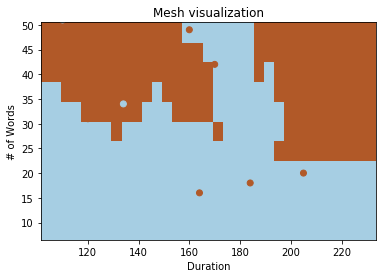

In [5]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Duration')
plt.ylabel('# of Words')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()